In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df_X= pd.read_csv('X.csv')

In [3]:
df_X = df_X.drop(df_X.columns[0:1], axis=1)

In [4]:
df_X.head()

,log_bathrooms,log_bedrooms,log_sqft_living,log_lat,flrs_1,flrs_1_5,flrs_2,flrs_2_5,flrs_3,flrs_3_5,...,zc_98146,zc_98148,zc_98155,zc_98166,zc_98168,zc_98177,zc_98178,zc_98188,zc_98198,zc_98199
0,-1.726549,-0.279725,-1.125582,-0.351367,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.339661,-0.279725,0.709463,1.160045,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.726549,-1.711651,-2.131943,1.281504,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.072660,0.736243,0.070676,-0.282062,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.039555,-0.279725,-0.292732,0.410214,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_y= pd.read_csv('y.csv')

In [6]:
df_y = df_y.drop(df_y.columns[0:1], axis=1)

In [7]:
df_y.head()

,log_price
0,-1.402030
1,0.279945
2,-1.799472
3,0.499710
4,0.178438


In [8]:
df = pd.concat([df_y, df_X], axis=1)

In [9]:
df.head()

,log_price,log_bathrooms,log_bedrooms,log_sqft_living,log_lat,flrs_1,flrs_1_5,flrs_2,flrs_2_5,flrs_3,...,zc_98146,zc_98148,zc_98155,zc_98166,zc_98168,zc_98177,zc_98178,zc_98188,zc_98198,zc_98199
0,-1.402030,-1.726549,-0.279725,-1.125582,-0.351367,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.279945,0.339661,-0.279725,0.709463,1.160045,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.799472,-1.726549,-1.711651,-2.131943,1.281504,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.499710,1.072660,0.736243,0.070676,-0.282062,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.178438,0.039555,-0.279725,-0.292732,0.410214,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df = df.iloc[np.random.permutation(len(df))]
df.head()

,log_price,log_bathrooms,log_bedrooms,log_sqft_living,log_lat,flrs_1,flrs_1_5,flrs_2,flrs_2_5,flrs_3,...,zc_98146,zc_98148,zc_98155,zc_98166,zc_98168,zc_98177,zc_98178,zc_98188,zc_98198,zc_98199
3352,-0.408065,-0.693444,-0.279725,-0.843475,1.216827,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16462,0.872512,-0.300676,0.736243,0.528395,0.761587,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13376,0.471038,1.276605,0.736243,0.697507,-0.108141,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17017,-0.355550,-0.300676,-0.279725,-0.002620,-0.036000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6131,-0.677306,0.608114,-0.279725,-0.452376,1.270725,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Set the data type in the dummy columns to 'category' type:
for categories in df.iloc[:,5:97].columns:
    df[categories] = df[categories].astype('category')

In [12]:
X =df.drop(df.columns[0:1], axis=1)
X.head()

,log_bathrooms,log_bedrooms,log_sqft_living,log_lat,flrs_1,flrs_1_5,flrs_2,flrs_2_5,flrs_3,flrs_3_5,...,zc_98146,zc_98148,zc_98155,zc_98166,zc_98168,zc_98177,zc_98178,zc_98188,zc_98198,zc_98199
3352,-0.693444,-0.279725,-0.843475,1.216827,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16462,-0.300676,0.736243,0.528395,0.761587,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13376,1.276605,0.736243,0.697507,-0.108141,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17017,-0.300676,-0.279725,-0.002620,-0.036000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6131,0.608114,-0.279725,-0.452376,1.270725,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y= pd.DataFrame(df['log_price'])
y.head()

,log_price
3352,-0.408065
16462,0.872512
13376,0.471038
17017,-0.355550
6131,-0.677306


In [14]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17277, 96) (17277, 1)
(4320, 96) (4320, 1)


In [15]:
# fit a model
linreg = linear_model.LinearRegression()
model = linreg.fit(X_train, y_train)
predictions = linreg.predict(X_test)

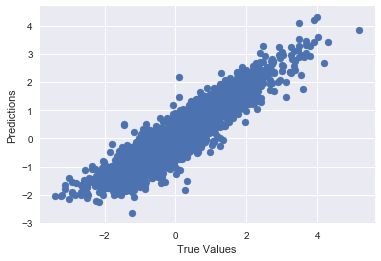

In [16]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show();

In [17]:
print("Score:", model.score(X_test, y_test))

Score: 0.8682053012658538


In [18]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [19]:
# Perform 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)
print('Cross-validated scores:', scores)

Cross-validated scores: [ 8.68420738e-01  8.62771030e-01 -1.28396577e+19  8.73773895e-01
  8.61943678e-01]


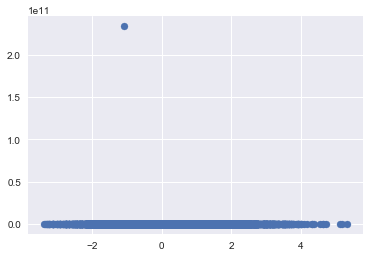

In [20]:
# Make cross validated predictions
cross_predictions = cross_val_predict(model, X, y, cv=5)
plt.scatter(y, cross_predictions);

In [21]:
# Perform 10-fold cross validation
scores = cross_val_score(model, X, y, cv=10)
print('Cross-validated scores:', scores)

Cross-validated scores: [ 8.67850376e-01  8.69616081e-01  8.62540023e-01  8.62682637e-01
 -1.47255491e+19  8.61182585e-01  8.67015989e-01  8.80548751e-01
  8.55525786e-01  8.68251184e-01]


In [22]:
# Perform 20-fold cross validation
scores = cross_val_score(model, X, y, cv=20)
print('Cross-validated scores:', scores)

Cross-validated scores: [ 8.67067719e-01  8.68164150e-01  8.60281838e-01  8.78034792e-01
  8.64878859e-01  8.59437936e-01  8.66229210e-01  8.58526627e-01
 -2.25808624e+21  8.58413867e-01  8.67975739e-01  8.54038717e-01
  8.67013486e-01  8.67134120e-01  8.78210332e-01  8.83383394e-01
  8.63484802e-01  8.47215239e-01  8.64166311e-01  8.71907002e-01]


In [24]:
accuracy = metrics.r2_score(y, cross_predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: -2.525409222741083e+18


In [ ]:
# Try the same thing below using example from Learn lesson

In [ ]:
# fit a model
linreg = linear_model.LinearRegression()
model = linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test) 
y_hat_train = linreg.predict(X_train)

In [ ]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [ ]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train MSE:', train_mse)
print('Test MSE:', test_mse)